<a href="https://colab.research.google.com/github/Olatim18/Study_Pyton/blob/master/detectLine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image read successful!


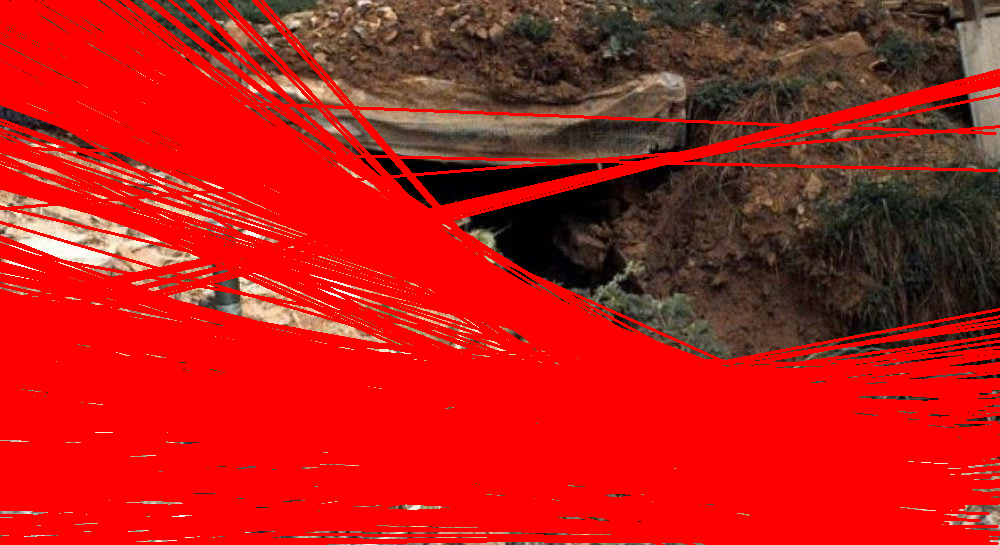

code successful!


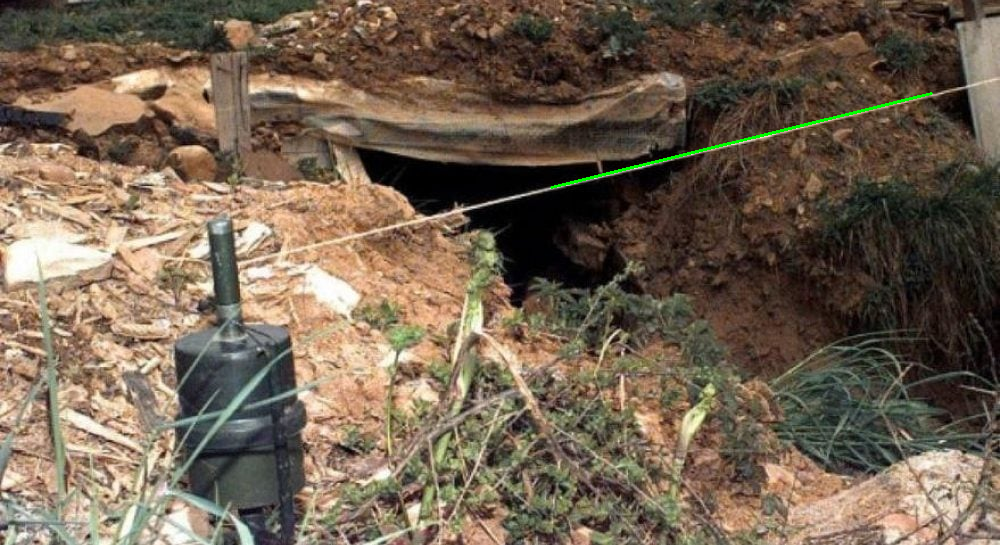

In [3]:
import cv2 as cv
import numpy as np
import matplotlib as plt
from PIL import Image
from google.colab.patches import cv2_imshow

# read image and check
filename = "/content/1000_545_1647690158-1399.jpg"
img = cv.imread(filename)
img_p = img.copy() # Используется для отображения результата обнаружения вероятностного преобразования Хафа

if img is None:
    print("Image read error!")
else:
    print("Image read successful!")
#cv2_imshow(img)
#print("code successful!1")
# image space change from BGR to GRAY
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# threshold
# _, binary = cv.threshold(img, 200, 255, cv.THRESH_BINARY)
_, binary = cv.threshold(gray, 0, 255, cv.THRESH_OTSU)

# edges detection with Canny method
edges = cv.Canny(binary, threshold1=10, threshold2=300)

# Функция HoughLines ()
lines = cv.HoughLines(edges, rho = 1, theta = 1 * np.pi/180, threshold=128, srn=0, stn = 0, min_theta=1, max_theta=20)

for i in range(0, len(lines)):
    rho, theta = lines[i][0][0], lines[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2_imshow(img)

# Функция HoughLinesP ()
lines_p = cv.HoughLinesP(edges, rho = 1, theta = np.pi/180, threshold = 128, minLineLength= 300, maxLineGap=8)

for i in range(len(lines_p)):
    x_1, y_1, x_2, y_2 = lines_p[i][0]
    cv.line(img_p, (x_1, y_1), (x_2, y_2), (0, 255, 0), 2)

print("code successful!")
cv2_imshow(img_p)

cv.waitKey(0)
cv.destroyAllWindows()

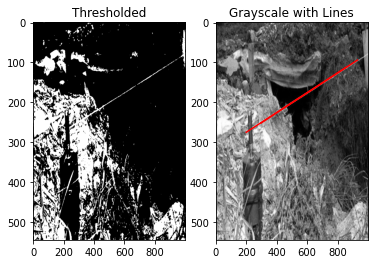

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Threshold 
filename = "/content/1000_545_1647690158-1399.jpg"
img = cv2.imread(filename)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_thr = cv2.threshold(img_gray, 150, 500, cv2.THRESH_BINARY)
fig, axs = plt.subplots(1, 2)
axs[0].set_title("Thresholded")
axs[0].imshow(img_thr, aspect="auto", cmap="gray")

# Find lines
lines = cv2.HoughLinesP(
    img_thr, rho=1, theta=np.pi / 180, threshold=500, minLineLength=600, maxLineGap=30)
lines = lines.squeeze()
axs[1].set_title("Grayscale with Lines")
axs[1].imshow(img_gray, aspect="auto", cmap="gray")
for x1, y1, x2, y2 in lines:
    axs[1].plot([x1, x2], [y1, y2], "r")
fig.show()

Hough Transform to detect straight lines and measure angles between them. 
https://en.wikipedia.org/wiki/Hough_transform
The origin is the top left corner of the original image. X and Y axis are 
horizontal and vertical edges respectively. The distance is the minimal 
algebraic distance from the origin to the detected line. The angle accuracy 
can be improved by decreasing the step size in the theta array.
https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html#sphx-glr-auto-examples-edges-plot-line-hough-transform-py
Image downloaded from: https://geometryhelp.net/wp-content/uploads/2019/04/intersecting-lines.jpg
Then inverted to dark background.


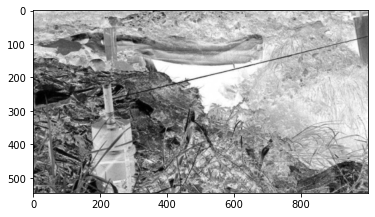

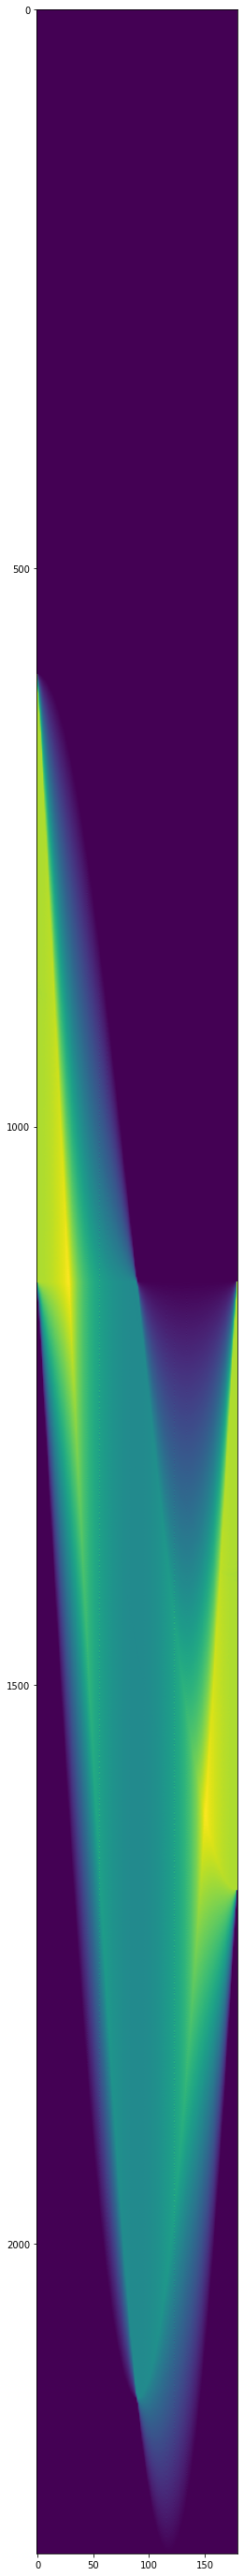

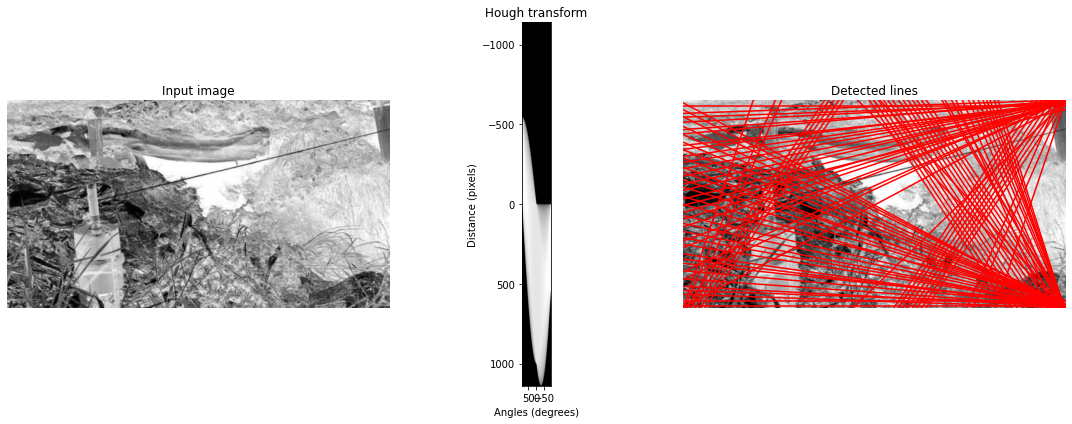

0.0


In [11]:
from skimage.transform import (hough_line, hough_line_peaks)
import numpy as np
import cv2
from matplotlib import pyplot as plt

filename = "/content/1000_545_1647690158-1399.jpg"
image = cv2.imread(filename)
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Fails if uses as-is due to bright background.
#Also try lines2 to see how it only picks up straight lines
#Invert images to show black background
image = ~image  #Invert the image (only if it had bright background that can confuse hough)
plt.imshow(image, cmap='gray')

# Set a precision of 1 degree. (Divide into 180 data points)
# You can increase the number of points if needed. 
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 180)

# Perform Hough Transformation to change x, y, to h, theta, dist space.
hspace, theta, dist = hough_line(image, tested_angles)

plt.figure(figsize=(50,50))
plt.imshow(hspace)  


#Now, to find the location of peaks in the hough space we can use hough_line_peaks
h, q, d = hough_line_peaks(hspace, theta, dist)


#################################################################
#Example ode from skimage documentation to plot the detected lines
angle_list=[]  #Create an empty list to capture all angles

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='gray', aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap='gray')

origin = np.array((0, image.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

###############################################################
# Convert angles from radians to degrees (1 rad = 180/pi degrees)
angles = [a*180/np.pi for a in angle_list]

# Compute difference between the two lines
angle_difference = np.max(angles) - np.min(angles)
print(180 - angle_difference)   #Subtracting from 180 to show it as the small angle between two lines

Detected line: (100 402) (401 349)


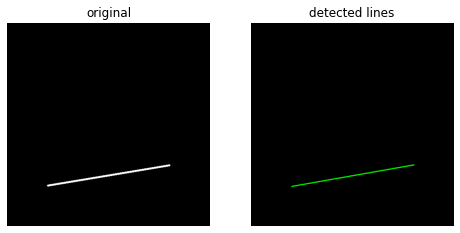

In [13]:
#1. Import the modules:
import cv2
import numpy as np
#2. Draw a test image:
img = np.zeros((500, 500), np.uint8)
cv2.line(img, (100, 400), (400, 350), 255, 3)
#3. Detect lines using the probabilistic Hough transform:
lines = cv2.HoughLinesP(img, 1, np.pi/180, 100, 100, 10)[0]
#4. Draw the detected lines and circles:
dbg_img = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
for x1, y1, x2, y2 in lines:
 print('Detected line: ({} {}) ({} {})'.format(x1, y1, x2, y2))
 cv2.line(dbg_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
#5. Visualize the results:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('original')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.title('detected lines')
plt.axis('off')
plt.imshow(dbg_img)
plt.show()


In [5]:
!pip install laspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for laspy: filename=laspy-2.4.0-py3-none-any.whl size=68080 sha256=c82415bc6058d988372ff2fffdfbce8b3bcbe8e111146d6ad61633448403359e
  Stored in directory: /root/.cache/pip/wheels/f6/cd/73/abde239f4b606cb8457e6ef332805560347cda89eccdccd5a3
Successfully built laspy


In [6]:
import laspy
import scipy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import path

In [ ]:
# Open a file in read mode:
inFile = laspy.file.File(“./LAS/simple.las”)
# Grab a numpy dataset of our clustering dimensions:
dataset = np.vstack([inFile.x, inFile.y, inFile.z]).transpose()dataset.shape

In [24]:
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
